<a href="https://colab.research.google.com/github/lj89/CORD19/blob/master/Polymerase_subset_find_topic_for_groups_after_clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polymerase subset of 1943 papers find topic for groups after clustering

### topics for each group:

#### G1 flu children clinical, 456 papers
#### G2 gene protein cell IFN, 679 papers
#### G3 bat host phylogenetic transmission spike, 41 papers
#### G4 SARS COV MERS COV, 133 papers
#### G5 diganosis asssay detection sensitivity specificity, 222 papers
#### G6 RdRp RNA replication RNA synthesis, 412 papers

##
##

##### Clustering code see: Polymerase subset of 1943 papers clustering

##### data see data folder


## Import Libraries

In [0]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [0]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import matplotlib
from nltk.tokenize import word_tokenize
from nltk import edit_distance
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
# # allow access to google drive files
# from google.colab import drive
# drive.mount('/content/drive')

In [60]:
data_path = "/content/drive/My Drive/Colab Notebooks/cord19/data/"
data_filename = data_path +"G1_1943tibbleABSTRACT_polymerase.csv"
print(data_filename)

/content/drive/My Drive/Colab Notebooks/cord19/data/G1_1943tibbleABSTRACT_polymerase.csv


## Import Data

In [61]:
import pandas as pd 

df = pd.read_csv(data_filename)  #start with window
df.head(5)

,Unnamed: 0,title,ABS,G1,G2,G3,G4,G5,G6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,34,Type-specific identification of influenza viru...,Abstract The aim of this study was to develop ...,1,0,0,0,0,0,0.129572,-0.046817,0.074797,0.265312,0.022438,0.214424,-0.272073,0.044107,-0.138467,-0.041966,0.046692,0.013104,0.043588,0.073960,-0.013146,-0.021852,0.058804,-0.001735,-0.018342,-0.090471,-0.004498,0.010231,0.066544,-0.070658,-0.037027,-0.019287,-0.068301,0.002445,-0.046797,0.109895
1,83,28 New and Emerging Infections of the Lung,Abstract In this era of rapid globalization an...,1,0,0,0,0,0,0.113790,0.028762,-0.030485,0.099784,-0.051313,0.079952,0.045585,0.080058,0.127040,0.078023,0.019718,-0.048446,0.075759,-0.028794,0.059543,-0.039232,-0.004433,0.017605,-0.021515,0.032565,-0.021466,-0.034395,-0.068766,0.062173,0.027105,-0.012494,0.005532,-0.046906,0.057766,0.024338
2,86,Identification of New Pathogens in the Intraoc...,Purpose To determine infectious causes in pati...,1,0,0,0,0,0,0.127007,-0.006698,-0.013548,-0.081415,-0.021746,-0.017922,-0.055342,0.077509,-0.119365,0.076744,-0.016484,0.004877,0.040589,0.094260,-0.018543,-0.028461,0.034266,0.033584,-0.010007,0.012539,0.067454,-0.012597,0.010953,-0.017202,-0.052399,0.009047,0.002374,-0.008487,-0.062251,-0.000006
3,87,2009 H1N1 Influenza: A Twenty-First Century Pa...,Abstract A swine-origin H1N1 triple-reassortan...,1,0,0,0,0,0,0.119648,-0.077578,-0.006618,0.134348,-0.040378,0.288035,-0.122467,0.005932,0.000684,-0.102166,0.014141,0.050371,0.004988,-0.067342,0.023881,0.034875,-0.014446,0.025796,-0.053584,-0.044931,0.006283,-0.031813,-0.049023,-0.036096,-0.050267,0.058426,-0.058325,0.028097,0.056863,0.105609
4,96,Multiplex Molecular Detection of Respiratory P...,Background Up to 80% of asthma exacerbations i...,1,0,0,0,0,0,0.199966,-0.128555,-0.101975,-0.050380,0.008443,-0.132211,0.086885,-0.065828,0.032912,0.026827,-0.034683,-0.044164,-0.037307,-0.045622,0.024622,0.043525,0.006021,-0.135989,0.075820,-0.047519,-0.072473,-0.158693,-0.055197,0.169608,-0.047646,0.175176,-0.146868,-0.075006,0.170679,0.246267


In [0]:
df.rename(columns = {'ABS':'abstract'}, inplace = True) 

In [63]:
df.head(5)

,Unnamed: 0,title,abstract,G1,G2,G3,G4,G5,G6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,34,Type-specific identification of influenza viru...,Abstract The aim of this study was to develop ...,1,0,0,0,0,0,0.129572,-0.046817,0.074797,0.265312,0.022438,0.214424,-0.272073,0.044107,-0.138467,-0.041966,0.046692,0.013104,0.043588,0.073960,-0.013146,-0.021852,0.058804,-0.001735,-0.018342,-0.090471,-0.004498,0.010231,0.066544,-0.070658,-0.037027,-0.019287,-0.068301,0.002445,-0.046797,0.109895
1,83,28 New and Emerging Infections of the Lung,Abstract In this era of rapid globalization an...,1,0,0,0,0,0,0.113790,0.028762,-0.030485,0.099784,-0.051313,0.079952,0.045585,0.080058,0.127040,0.078023,0.019718,-0.048446,0.075759,-0.028794,0.059543,-0.039232,-0.004433,0.017605,-0.021515,0.032565,-0.021466,-0.034395,-0.068766,0.062173,0.027105,-0.012494,0.005532,-0.046906,0.057766,0.024338
2,86,Identification of New Pathogens in the Intraoc...,Purpose To determine infectious causes in pati...,1,0,0,0,0,0,0.127007,-0.006698,-0.013548,-0.081415,-0.021746,-0.017922,-0.055342,0.077509,-0.119365,0.076744,-0.016484,0.004877,0.040589,0.094260,-0.018543,-0.028461,0.034266,0.033584,-0.010007,0.012539,0.067454,-0.012597,0.010953,-0.017202,-0.052399,0.009047,0.002374,-0.008487,-0.062251,-0.000006
3,87,2009 H1N1 Influenza: A Twenty-First Century Pa...,Abstract A swine-origin H1N1 triple-reassortan...,1,0,0,0,0,0,0.119648,-0.077578,-0.006618,0.134348,-0.040378,0.288035,-0.122467,0.005932,0.000684,-0.102166,0.014141,0.050371,0.004988,-0.067342,0.023881,0.034875,-0.014446,0.025796,-0.053584,-0.044931,0.006283,-0.031813,-0.049023,-0.036096,-0.050267,0.058426,-0.058325,0.028097,0.056863,0.105609
4,96,Multiplex Molecular Detection of Respiratory P...,Background Up to 80% of asthma exacerbations i...,1,0,0,0,0,0,0.199966,-0.128555,-0.101975,-0.050380,0.008443,-0.132211,0.086885,-0.065828,0.032912,0.026827,-0.034683,-0.044164,-0.037307,-0.045622,0.024622,0.043525,0.006021,-0.135989,0.075820,-0.047519,-0.072473,-0.158693,-0.055197,0.169608,-0.047646,0.175176,-0.146868,-0.075006,0.170679,0.246267


In [64]:
df.shape

(456, 39)

In [65]:
df.isnull().sum()

Unnamed: 0    0
title         0
abstract      0
G1            0
G2            0
G3            0
G4            0
G5            0
G6            0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
dtype: int64

In [0]:
outString = ' '.join(df.abstract) #dropna, drop duplicates
#print (outString)

In [67]:
len(outString ) #6,805,659  # WINDOW 735,294

791471

## Remove stopwords and apply stemmer on words

In [0]:
def stems(words, method) :
    prtr = nltk.stem.PorterStemmer()
    snob = nltk.stem.SnowballStemmer('english')
    lema = nltk.wordnet.WordNetLemmatizer()
    
    word_to_stem = stopwords_removal(words)

    stem = [w for w in word_to_stem]
    stem = []
    
    if method == 'porter' :
        for w in word_to_stem:
            stem.append(prtr.stem(w))
 
    elif method == 'snowball': 
        for w in word_to_stem:
            stem.append(snob.stem(w))

    return (stem)

In [0]:
def stopwords_removal(words) :
    stop_word = set(stopwords.words('english'))
    word_token = word_tokenize(words)
    output_sentence = [words for word in word_token if not word in stop_word]
    output_sentence = []
    for w in word_token:
        if w not in stop_word:
            output_sentence.append(w)
    return(output_sentence)


In [70]:
stopwords_output = stopwords_removal(outString)
for w in stopwords_output:
    print(w+"|",end=' ') #nltk problem, this part cannot run on colab, but can run on kaggle kernel #Resource stopwords not found.

LookupError: ignored

In [71]:
snowball_stems = stems(outString, "snowball")
print("After stemming, there are",len(snowball_stems),"words. And they are as following:")
print()
for s in snowball_stems:
    print(s+"|",end=' ')
    
 #After stemming, there are 290097 words. And they are as following:

LookupError: ignored

In [72]:
import string
x=snowball_stems
x = [''.join(c for c in s if c not in string.punctuation) for s in x]
x

NameError: ignored

In [0]:
x = [s for s in x if s]
x

## EDA - top words

#### Before modeling, I'd like to check what words talked about most in this subset of "Polymerase" papers. We can also identify more keywords for further analysis form the top word list and word cloud.

In [0]:
# from collections import Counter
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib

# matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 300
# barWidth = 0.25
# plt.figure(figsize=(20,15))

# counts = Counter(x)
# common = counts.most_common(50)
# labels = [item[0] for item in common]
# number = [item[1] for item in common]
# nbars = len(common)

# plt.bar(np.arange(nbars), number,width=barWidth, tick_label=labels)
# plt.xticks(rotation = 90, fontweight='bold',fontsize=12,)
# plt.show()

In [0]:
# x can not use on colab
# barWidth = 0.25
# plt.figure(figsize=(20,40))

# counts = Counter(x)
# common = counts.most_common(200)
# labels = [item[0] for item in common]
# number = [item[1] for item in common]
# nbars = len(common)

# plt.barh(np.arange(nbars), number,tick_label=labels) #width=barWidth, 
# plt.xticks( fontweight='bold',fontsize=12,) #rotation = 90,
# plt.title('Top 200 words in titles of ' +str(df.ABS.shape[0])+  ' research papers mentioned Polymerase',fontsize=15)#,fontweight='bold'   #df2.title.shape
# plt.show()

## Customize stop words

In [0]:
customize_stop_words2 = [
    'used', 'using', 'SARS CoV','MERS CoV','Abstract','found','result','method','conclusion','results','case','cases',
    'compared','many','well','including','identified','Although','present','Middle East','infection','patient','reaction',
    'infectious','treatment','China','East','Role','COVID','human','model','Chapter','viruses','methods','disease','BACKGROUND','CONCLUSIONS','polymerase chain', 'chain reaction', 'PCR',
]
#capital letter must match

STOPWORDS2 = list(STOPWORDS)  + customize_stop_words2

## Word Cloud

<Figure size 1440x720 with 0 Axes>

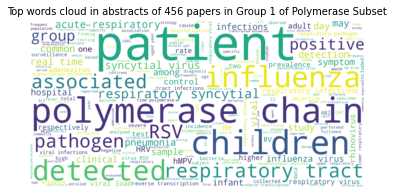

<Figure size 1440x720 with 0 Axes>

In [74]:
text = outString

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000,stopwords = STOPWORDS2,  background_color="white").generate(text)

#matplotlib.rcParams['font.sans-serif'] = "Arial"
#matplotlib.rcParams['figure.dpi'] = 300

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words cloud in abstracts of ' +str(df.abstract.shape[0])+  ' papers in Group 1 of Polymerase Subset',fontsize=10)#,fontweight='bold'
#plt.show()


# wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure( figsize=(20,10) )
#plt.imshow(wordcloud)

# G1 topic flu children clinical

In [0]:
# text = outString

# # Create and generate a word cloud image:
# wordcloud = WordCloud(stopwords = STOPWORDS2,  background_color="white").generate(text)

# #matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 300

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Top words cloud in abstracts of ' +str(df2.abstract.shape[0])+  ' research papers mentioned Polymerase in Group 1',fontsize=10)#,fontweight='bold'
# plt.show()

In [76]:
df2.shape

(679, 39)

<Figure size 1440x720 with 0 Axes>

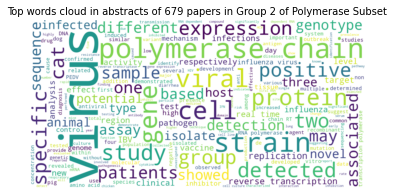

<Figure size 1440x720 with 0 Axes>

In [77]:
data_filename2 = data_path +"G2_1943tibbleABSTRACT_polymerase.csv"


df2 = pd.read_csv(data_filename2) 

df2.rename(columns = {'ABS':'abstract'}, inplace = True) 


outString2 = ' '.join(df2.abstract) #dropna, drop duplicates
#print (outString)


text = outString2

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000,stopwords = STOPWORDS2,  background_color="white").generate(text)

#matplotlib.rcParams['font.sans-serif'] = "Arial"
#matplotlib.rcParams['figure.dpi'] = 300

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words cloud in abstracts of ' +str(df2.abstract.shape[0])+  ' papers in Group 2 of Polymerase Subset',fontsize=10)#,fontweight='bold'
#plt.show()

# wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure( figsize=(20,10) )
#plt.imshow(wordcloud)

#rm words in all groups
# 'polymerase chain', 'chain reaction', 'PCR','patient',

#G2 topic gene protein cell IFN IBV

<Figure size 1440x720 with 0 Axes>

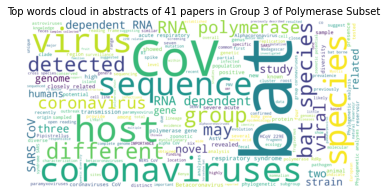

<Figure size 1440x720 with 0 Axes>

In [78]:
data_filename3 = data_path +"G3_1943tibbleABSTRACT_polymerase.csv"


df3 = pd.read_csv(data_filename3) 

df3.rename(columns = {'ABS':'abstract'}, inplace = True) 


outString3 = ' '.join(df3.abstract) #dropna, drop duplicates
#print (outString)


text = outString3

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000,stopwords = STOPWORDS2,  background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words cloud in abstracts of ' +str(df3.abstract.shape[0])+  ' papers in Group 3 of Polymerase Subset',fontsize=10)#,fontweight='bold'


plt.figure( figsize=(20,10) )


# G3 topic bat host phylogenetic transmission spike

<Figure size 1440x720 with 0 Axes>

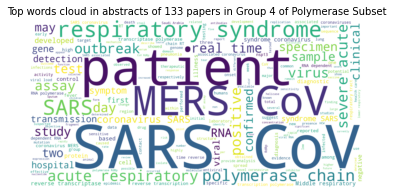

<Figure size 1440x720 with 0 Axes>

In [79]:
data_filename4 = data_path +"G4_1943tibbleABSTRACT_polymerase.csv"


df4 = pd.read_csv(data_filename4) 

df4.rename(columns = {'ABS':'abstract'}, inplace = True) 


outString4 = ' '.join(df4.abstract) #dropna, drop duplicates
#print (outString)


text = outString4

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000,stopwords = STOPWORDS2,  background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words cloud in abstracts of ' +str(df4.abstract.shape[0])+  ' papers in Group 4 of Polymerase Subset',fontsize=10)#,fontweight='bold'


plt.figure( figsize=(20,10) )


# G4 SARS COV MERS COV

<Figure size 1440x720 with 0 Axes>

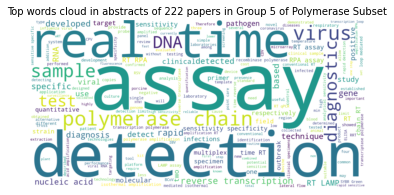

<Figure size 1440x720 with 0 Axes>

In [80]:
data_filename5 = data_path +"G5_1943tibbleABSTRACT_polymerase.csv"


df5 = pd.read_csv(data_filename5) 

df5.rename(columns = {'ABS':'abstract'}, inplace = True) 


outString5 = ' '.join(df5.abstract) #dropna, drop duplicates
#print (outString)


text = outString5

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000,stopwords = STOPWORDS2,  background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words cloud in abstracts of ' +str(df5.abstract.shape[0])+  ' papers in Group 5 of Polymerase Subset',fontsize=10)#,fontweight='bold'


plt.figure( figsize=(20,10) )


# G5 diganosis asssay detection sensitivity specificity

<Figure size 1440x720 with 0 Axes>

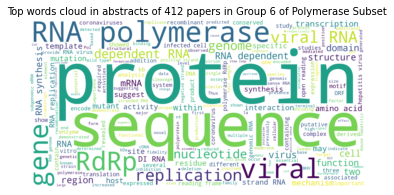

<Figure size 1440x720 with 0 Axes>

In [81]:
data_filename6 = data_path +"G6_1943tibbleABSTRACT_polymerase.csv"


df6 = pd.read_csv(data_filename6) 

df6.rename(columns = {'ABS':'abstract'}, inplace = True) 


outString6 = ' '.join(df6.abstract) #dropna, drop duplicates
#print (outString)


text = outString6

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1000,stopwords = STOPWORDS2,  background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words cloud in abstracts of ' +str(df6.abstract.shape[0])+  ' papers in Group 6 of Polymerase Subset',fontsize=10)#,fontweight='bold'


plt.figure( figsize=(20,10) )


# G6 topic RdRp RNA replication RNA synthesis